In [1]:
import pandas_datareader as pdr
# to create dataframe from an api response
# a collection of libraries to access data(tiingo in this problem)

In [2]:
df = pdr.get_data_tiingo('META',api_key='240e46cda321e42af3f244480052b1c1b4e82fd4')
# first parameter is share name and key should be replaced with real api key

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('aapl.csv')
# saving df as csv file

In [4]:
import pandas as pd
# for data cleaning

In [5]:
df = pd.read_csv('aapl.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,META,2017-11-13 00:00:00+00:00,178.77,179.04,177.30,177.50,9431449,178.77,179.04,177.30,177.50,9431449,0.0,1.0
1,META,2017-11-14 00:00:00+00:00,178.07,178.97,177.18,178.13,9465112,178.07,178.97,177.18,178.13,9465112,0.0,1.0
2,META,2017-11-15 00:00:00+00:00,177.95,178.57,176.40,176.66,10131051,177.95,178.57,176.40,176.66,10131051,0.0,1.0
3,META,2017-11-16 00:00:00+00:00,179.59,179.83,178.50,178.76,15230062,179.59,179.83,178.50,178.76,15230062,0.0,1.0
4,META,2017-11-17 00:00:00+00:00,179.00,179.98,178.90,179.30,12722802,179.00,179.98,178.90,179.30,12722802,0.0,1.0


In [7]:
df.tail(200)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1057,META,2022-01-26 00:00:00+00:00,294.63,307.5100,290.8500,307.0100,28348801,294.63,307.5100,290.8500,307.0100,28348801,0.0,1.0
1058,META,2022-01-27 00:00:00+00:00,294.64,301.7090,294.2600,297.7520,21629922,294.64,301.7090,294.2600,297.7520,21629922,0.0,1.0
1059,META,2022-01-28 00:00:00+00:00,301.71,301.9000,293.0333,295.6204,21871620,301.71,301.9000,293.0333,295.6204,21871620,0.0,1.0
1060,META,2022-01-31 00:00:00+00:00,313.26,313.7900,299.3200,300.6800,21579474,313.26,313.7900,299.3200,300.6800,21579474,0.0,1.0
1061,META,2022-02-01 00:00:00+00:00,319.00,319.6598,312.1200,314.5550,18023796,319.00,319.6598,312.1200,314.5550,18023796,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,META,2022-11-03 00:00:00+00:00,88.91,90.4576,88.4100,90.0800,60664012,88.91,90.4576,88.4100,90.0800,60664012,0.0,1.0
1253,META,2022-11-04 00:00:00+00:00,90.79,91.3900,88.0900,90.3500,55638061,90.79,91.3900,88.0900,90.3500,55638061,0.0,1.0
1254,META,2022-11-07 00:00:00+00:00,96.72,96.8800,93.1000,94.7800,81987295,96.72,96.8800,93.1000,94.7800,81987295,0.0,1.0
1255,META,2022-11-08 00:00:00+00:00,96.47,97.8000,94.7900,95.9200,52088320,96.47,97.8000,94.7900,95.9200,52088320,0.0,1.0


In [8]:
df2 = df.reset_index()['close']
# getting close column value from dataframe

In [9]:
df2.tail()

1252     88.91
1253     90.79
1254     96.72
1255     96.47
1256    101.47
Name: close, dtype: float64

In [10]:
df2.shape

(1257,)

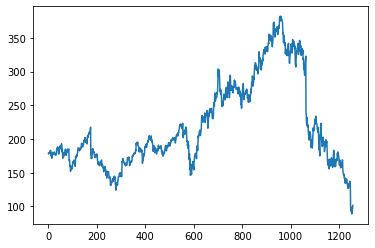

In [11]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [12]:
# LSTM are very sensitive to scale of the data, so we apply MinMax scaler (0,1)
import numpy as np
from sklearn.preprocessing import MinMaxScaler\

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df2).reshape(-1,1))

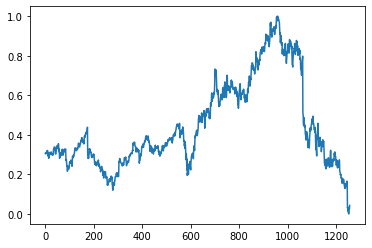

In [13]:
plt.plot(df1)

In [14]:
df1.shape

(1257, 1)

In [15]:
#train-test split

train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data, test_data = df1[0:train_size,:],df1[train_size:,:]

In [16]:
train_data.shape

(817, 1)

In [17]:
test_data.shape

(440, 1)

In [18]:
# Create dataset of number of elemets to be considererd 
import numpy
def create_dataset(dataset,time_step=1):
  dataX,dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return numpy.array(dataX), numpy.array(dataY)

In [19]:
# consider previous 100 days for todays prediction
time_step = 100

# creating both train and test
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [20]:
print(X_train)

[[0.30640707 0.30402019 0.30361101 ... 0.24015412 0.23285709 0.23534627]
 [0.30402019 0.30361101 0.30920312 ... 0.23285709 0.23534627 0.25959014]
 [0.30361101 0.30920312 0.30719133 ... 0.23534627 0.25959014 0.26395472]
 ...
 [0.62573738 0.59538991 0.56572442 ... 0.60606267 0.6055171  0.61100692]
 [0.59538991 0.56572442 0.55791591 ... 0.6055171  0.61100692 0.60582398]
 [0.56572442 0.55791591 0.54298087 ... 0.61100692 0.60582398 0.61561019]]


In [21]:
X_train.shape

(716, 100)

In [22]:
y_test.shape

(339,)

In [23]:
y_train.shape

(716,)

In [24]:
# reshape input to [samples,time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
#create stack lstm model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 119ms/step - loss: 0.0641 - val_loss: 0.0187
Epoch 2/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0083 - val_loss: 0.0182
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0054 - val_loss: 0.0233
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0034 - val_loss: 0.0087
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0022 - val_loss: 0.0064
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0018 - val_loss: 0.0067
Epoch 7/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0018 - val_loss: 0.0073
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0017 - val_loss: 0.0068
Epoch 9/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0016 - val_loss: 0.0066
Epoch 10/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0017 - val_loss: 0.00

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 7ms/step


In [30]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

#train data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

201.88827501147512

In [32]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

259.0402008573655

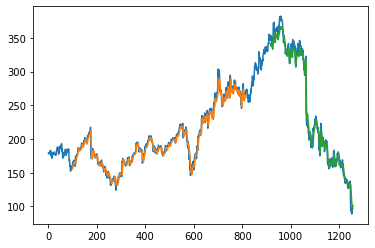

In [33]:
# Plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

#plot
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

440

In [39]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_list = list(x_input)
temp_list = temp_list[0].tolist()
temp_list

In [41]:
# prediction for next 30 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):
  if(len(temp_list)>100):
    x_input = np.array(temp_list[1:])
    # print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))

    yhat = model.predict(x_input, verbose=0)
    # print("{} day output {}".format(i,yhat))
    temp_list.extend(yhat[0].tolist())
    temp_list = temp_list[1:]
    
    lst_output.extend(yhat.tolist())
    i+=1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    # print(yhat[0])
    temp_list.extend(yhat[0].tolist())
    # print(len(temp_list))
    lst_output.extend(yhat.tolist())
    i+=1
# print(lst_output)

In [42]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [43]:
len(df1)

1257

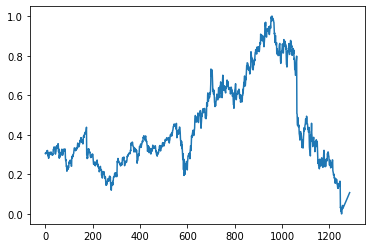

In [44]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3)

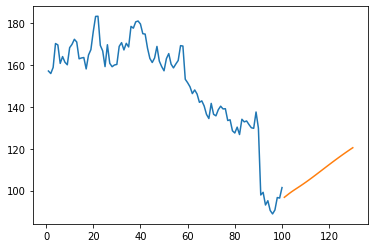

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3

In [ ]:
lst_output

In [48]:
# predictions for next 30 days
scaler.inverse_transform(lst_output)

array([[ 96.82784938],
       [ 97.70321626],
       [ 98.5899464 ],
       [ 99.41547325],
       [100.18623447],
       [100.92857935],
       [101.66595874],
       [102.4133423 ],
       [103.17813838],
       [103.96267623],
       [104.76635713],
       [105.58709112],
       [106.42209336],
       [107.26835726],
       [108.12285982],
       [108.98268075],
       [109.84509968],
       [110.70759508],
       [111.5678989 ],
       [112.42401183],
       [113.27418584],
       [114.11690671],
       [114.95089838],
       [115.77508581],
       [116.58858843],
       [117.39067427],
       [118.18074898],
       [118.95833842],
       [119.72307551],
       [120.47465214]])